# Capstone: Supervised Learning

First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about **explanatory versus predictive power** and experiment with both.

Please execute the three tasks above in a Jupyter notebook that you will submit to the grading team below.

Next, in order to prepare for your presentation, create a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

* A specified research question your model addresses
* How you chose your model specification and what alternatives you compared it to
* The practical uses of your model for an audience of interest
* Any weak points or shortcomings of your model

This presentation is not a drill. You'll be presenting this slide deck live to a group as the culmination of all your work so far on supervised learning. As a secondary matter, your slides and the Jupyter notebook should be worthy of inclusion as examples of your work product when applying to jobs.

# Breast Cancer Wisconsin (Diagnostic) Data Set
Context information below from: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

    1) id
    2) diagnosis (M = malignant, B = benign)
    3) radius_mean (mean of distances from center to points on the perimeter)
    4) texture_mean (standard deviation of gray-scale values)
    5) perimeter_mean
    6) area_mean
    7) smoothness_mean (local variation in radius lengths)
    8) compactness_mean (perimeter^2 / area - 1.0)
    9) concavity_mean (severity of concave portions of the contour)
    10) concave_points_mean (number of concave portions of the contour)
    11) symmetry_mean
    12) fractal_dimension_mean ("coastline approximation" - 1)
    13) radius_se
    14) texture_se
    15) perimeter_se
    16) area_se
    17) smoothness_se
    18) compactness_se
    19) concavity_se
    20) concave_points_se
    21) symmetry_se
    22) fractal_dimension_se
    23) radius_worst
    24) texture_worst
    25) perimeter_worst
    26) area_worst
    27) smoothness_worst
    28) compactness_worst
    29) concavity_worst
    30) concave_points_worst
    31) symmetry_worst
    32) fractal_dimension_worst

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each cell nuclei, resulting in 30 features.

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, normaltest, jarque_bera, ttest_ind

from sklearn.metrics import mean_squared_error, f1_score
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn import ensemble
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline

## Load Data

In [2]:
# Load data from Wisconsin Breast Cancer Data Set
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
bc_df = pd.read_csv('breast_cancer_wisconsin_data.csv')

In [3]:
# View dataframe
bc_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

## Clean and Explore Data

In [4]:
# Convert diagnosis to binary with majority class (B) as negative
lb = LabelBinarizer()
bc_df['diagnosis'] = lb.fit_transform(bc_df['diagnosis'].values)
bc_df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                0.14710  ...          17.33           184.60      2019.0   
1                0.07017  ...          23.41           158.80      1956.0   
2                0.12790  ...          25.53           152.50      1709.0   
3                0.10520  ...          26.50            98.87       567.7   
4                0.10430  ...          16.67           152.20      1575.0   
..                   ...  ...            ...              ...         ...   
564              0.13890  ...          26.40           166.10      2027.0   
565              0.09791  ...          38.25           155.00      1731.0   
566              0.05302  ...          34.12           126.70      1124.0   
567              0.15200  ...          39.42           184.60      1821.0   
568              0.00000  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572                  0.06637   
566                0.1418          0.2218

In [5]:
# Remove 'Unnamed: 32' column
bc_df.drop('Unnamed: 32', inplace=True, axis=1)

In [6]:
# Standardize column/feature names
bc_df.rename(columns=lambda x: x.replace(' ', '_').strip(), inplace=True)

In [7]:
# Review dataframe
bc_df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [8]:
# Look for missing values
bc_df.isnull().sum() / bc_df.isnull().count() * 100

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave_points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave_points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave_points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

There are no missing values.

### Evaluate distribution of each variable

P-values:
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0


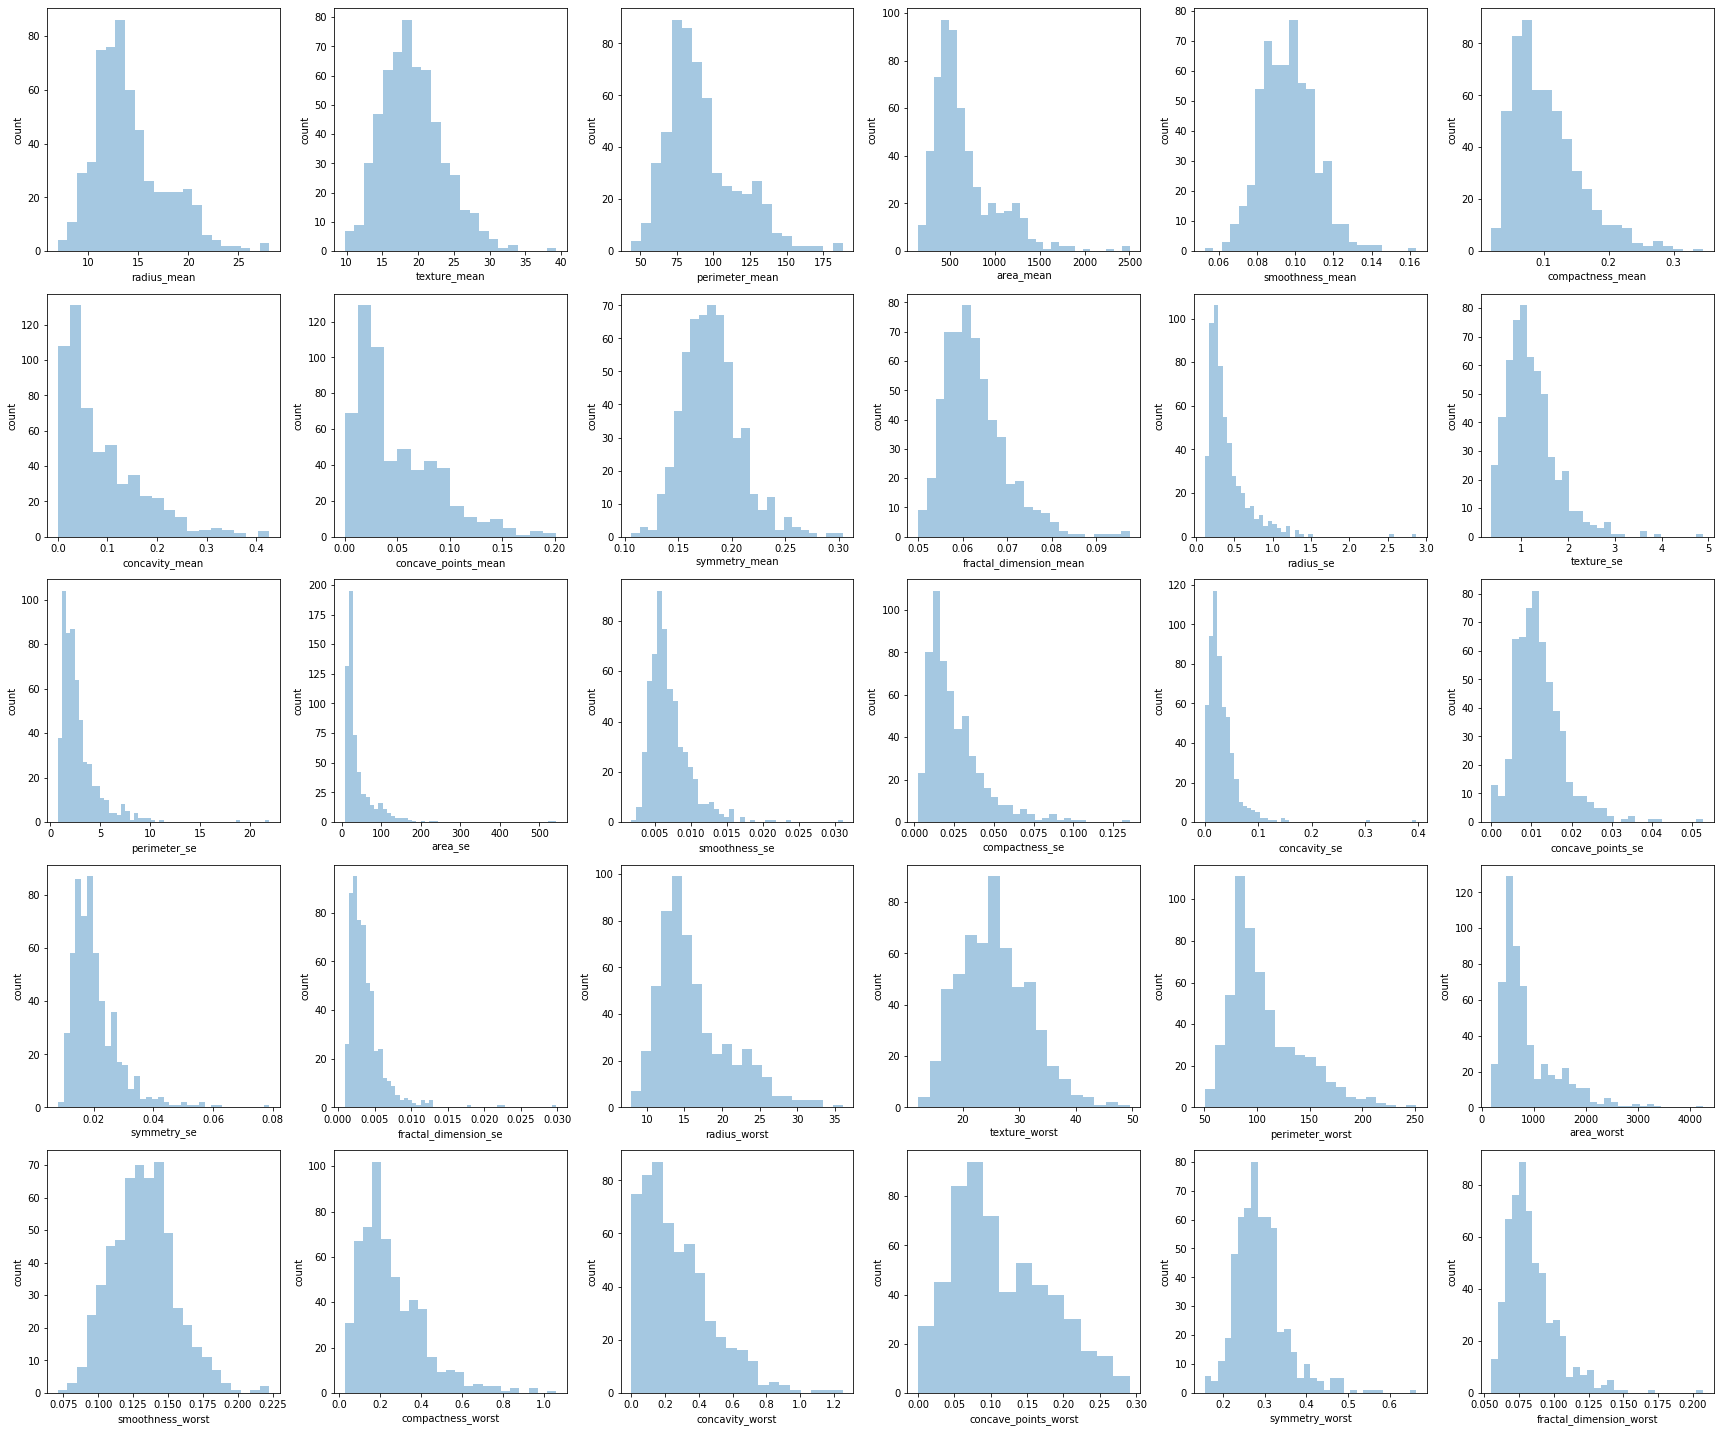

In [9]:
plt.figure(figsize=(24, 20))

print('P-values:')

for n, col in enumerate(bc_df.drop(['id', 'diagnosis'], axis=1)):
    plt.subplot(5, 6, n + 1)
    sns.distplot(bc_df[col], kde=False)
    jb_stats = jarque_bera(bc_df[col])
    norm_stats = normaltest(bc_df[col])
    print(
        'Jarque-Bera: {}; Normality: {}'.format(round(jb_stats[1], 4), round(norm_stats[1], 4)))
    plt.ylabel('count')

plt.tight_layout()
plt.show()

None of the distributions are normal (p-values less than 0.05 for both normality tests).

### Evaluate distribution of each variable following box-cox transformation

P-values:
Jarque-Bera: 0.7959; Normality: 0.8414
Jarque-Bera: 0.9259; Normality: 0.9652
Jarque-Bera: 0.8259; Normality: 0.8729
Jarque-Bera: 0.8783; Normality: 0.9242
Jarque-Bera: 0.5136; Normality: 0.483
Jarque-Bera: 0.0014; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.0; Normality: 0.0
Jarque-Bera: 0.2869; Normality: 0.3022
Jarque-Bera: 0.5209; Normality: 0.5174
Jarque-Bera: 0.0002; Normality: 0.0
Jarque-Bera: 0.5608; Normality: 0.5608
Jarque-Bera: 0.014; Normality: 0.0004
Jarque-Bera: 0.0677; Normality: 0.0167
Jarque-Bera: 0.3571; Normality: 0.3407
Jarque-Bera: 0.0001; Normality: 0.0
Jarque-Bera: 0.0234; Normality: 0.004
Jarque-Bera: 0.0841; Normality: 0.1274
Jarque-Bera: 0.0289; Normality: 0.0055
Jarque-Bera: 0.0007; Normality: 0.0
Jarque-Bera: 0.15; Normality: 0.0702
Jarque-Bera: 0.3052; Normality: 0.2326
Jarque-Bera: 0.1278; Normality: 0.0513
Jarque-Bera: 0.2189; Normality: 0.1369
Jarque-Bera: 0.9988; Normality: 0.9808
Jarque-Bera: 0.0044; Normality: 0.0
Jarque-B

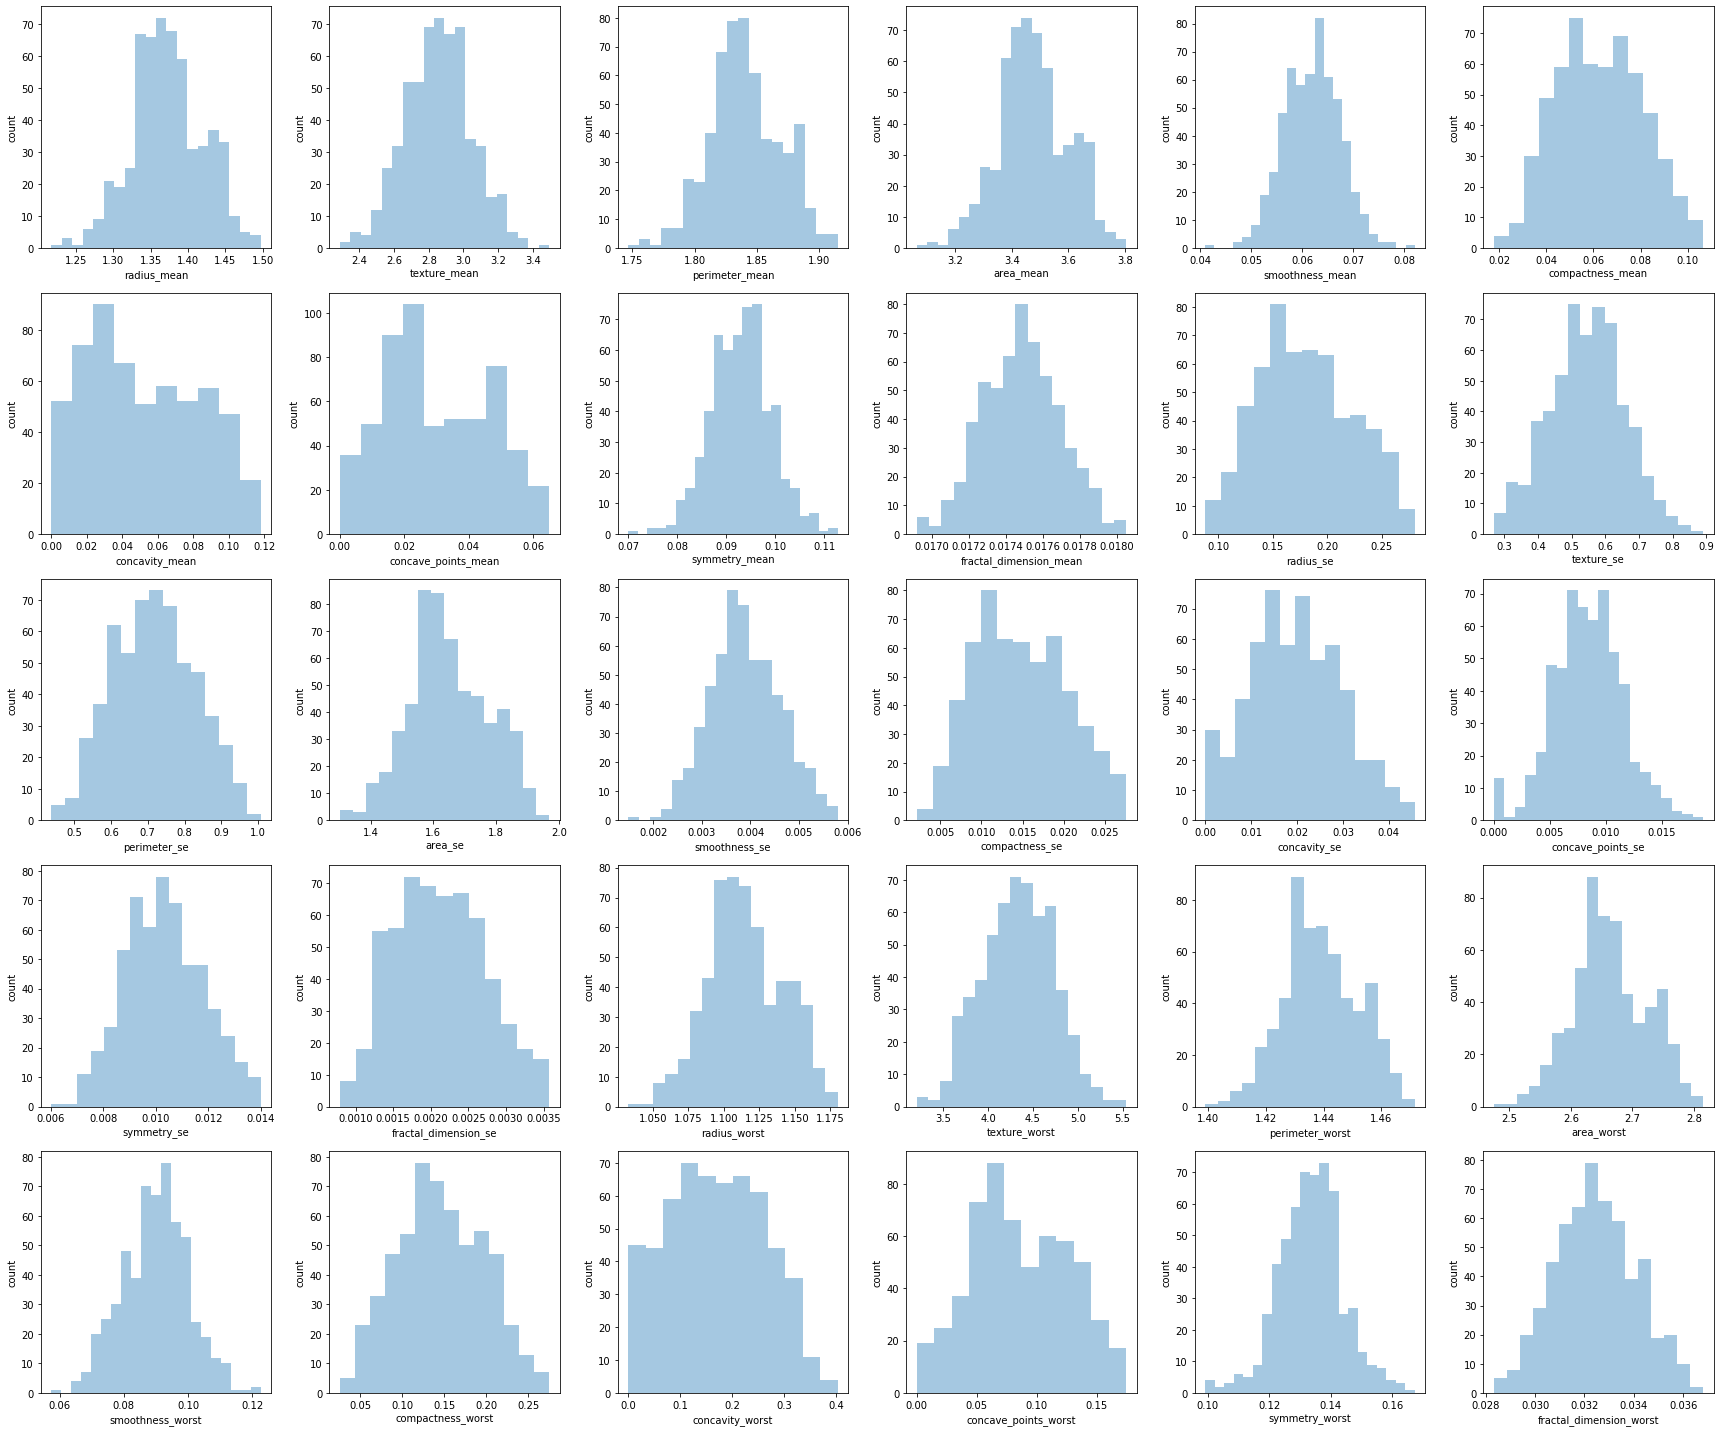

In [10]:
plt.figure(figsize=(24, 20))

print('P-values:')

for n, col in enumerate(bc_df.drop(['id', 'diagnosis'], axis=1)):
    plt.subplot(5, 6, n + 1)
    name = '{}_boxcox'.format(col)
    name, _ = boxcox(bc_df[col] + 1)
    sns.distplot(name, kde=False)
    jb_stats = jarque_bera(name)
    norm_stats = normaltest(name)
    print(
        'Jarque-Bera: {}; Normality: {}'.format(round(jb_stats[1], 4), round(norm_stats[1], 4)))
    plt.ylabel('count')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

The histograms above resemble normal distributions quite well, even though they are not all perfectly normally distributed, as confirmed by the Jarque-Bera and Normality tests.

### Evaluate class imbalance

In [11]:
# Determine class distribution for diagnosis
benign = bc_df['diagnosis'][bc_df['diagnosis'] == 0].count()
malignant = bc_df['diagnosis'][bc_df['diagnosis'] == 1].count()
print('Class distribution: {} benign, {} malignant ({}%)'.format(
    benign, malignant, round(benign / (benign + malignant), 2) * 100))

Class distribution: 357 benign, 212 malignant (63.0%)


## Select Features Based on Predictive Power and Correlation

### Evaluate relationship between diagnosis and box-cox transformed variables

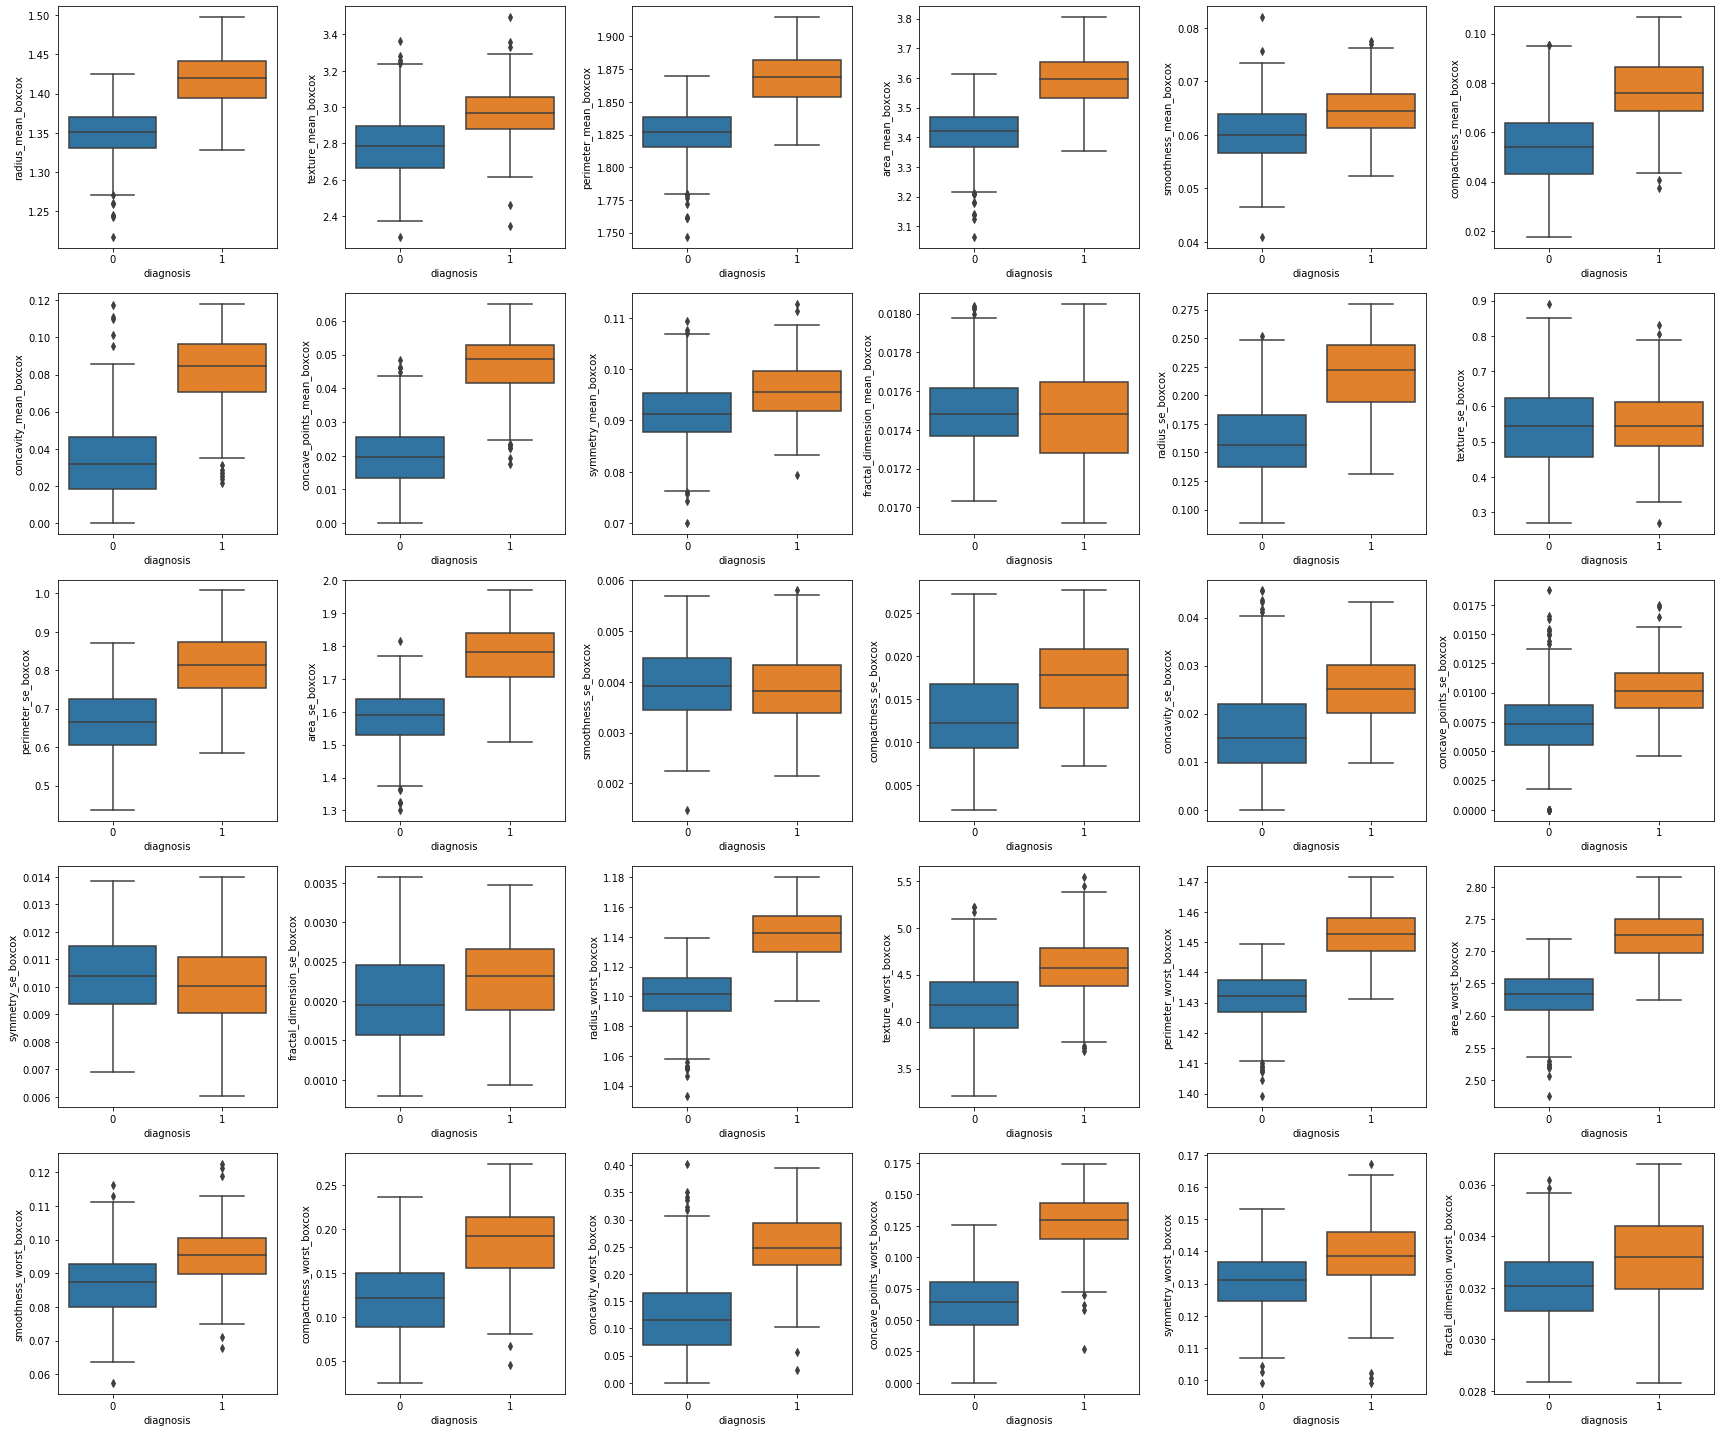

In [12]:
# Box-cox transform the variables
var = bc_df.drop(['id', 'diagnosis'], axis=1)
var_boxcox = pd.DataFrame()

for col in var:
    temp_var, _ = boxcox(var[col] + 1)
    name = '{}_boxcox'.format(col)
    var_boxcox[name] = temp_var

# Plot the newly transformed variables based on diagnosis
plt.figure(figsize=(24, 20))

for n, col in enumerate(var_boxcox):
    plt.subplot(5, 6, n + 1)
    sns.boxplot(x=bc_df['diagnosis'], y=var_boxcox[col])

plt.tight_layout()
plt.show()

In [13]:
# Perform t-test to identify variables that do not predict
# diagnosis (p-value greater than 0.05)
not_pred_var = []

for n, col in enumerate(var_boxcox):
    if ttest_ind(var_boxcox[bc_df['diagnosis'] == 1][col],
                 var_boxcox[bc_df['diagnosis'] == 0][col]
                 )[1] > 0.05:
        not_pred_var.append(var_boxcox[col].name)

not_pred_var

['fractal_dimension_mean_boxcox',
 'texture_se_boxcox',
 'smoothness_se_boxcox',
 'symmetry_se_boxcox']

The difference between malignant and benign is signficant for all of the variables except fractal_dimension_mean_boxcox, texture_se_boxcox, smoothness_se_boxcox, and symmetry_se_boxcox.

In [14]:
# Drop non-predictive features
var_boxcox_pred = var_boxcox.drop(not_pred_var, axis=1)

### Evaluate correlation between box-cox transformed variables

In [15]:
# Correlation matrix for box-cox transformed variables
var_boxcox_pred.corr()

radius_mean_boxcox  texture_mean_boxcox  \
radius_mean_boxcox                        1.000000             0.317611   
texture_mean_boxcox                       0.317611             1.000000   
perimeter_mean_boxcox                     0.998025             0.322128   
area_mean_boxcox                          0.999606             0.319977   
smoothness_mean_boxcox                    0.151582            -0.014937   
compactness_mean_boxcox                   0.485146             0.241303   
concavity_mean_boxcox                     0.650142             0.320807   
concave_points_mean_boxcox                0.773487             0.287649   
symmetry_mean_boxcox                      0.119046             0.084592   
radius_se_boxcox                          0.581908             0.345734   
perimeter_se_boxcox                       0.581809             0.366986   
area_se_boxcox                            0.761438             0.376399   
compactness_se_boxcox                     0.247525             0.240705   
concavity_se_boxcox                       0.348424             0.248064   
concave_points_se_boxcox                  0.418479             0.188716   
fractal_dimension_se_boxcox              -0.030684             0.123118   
radius_worst_boxcox                       0.979187             0.345020   
texture_worst_boxcox                      0.301237             0.916720   
perimeter_worst_boxcox                    0.973967             0.349997   
area_worst_boxcox                         0.979035             0.345383   
smoothness_worst_boxcox                   0.105457             0.073318   
compactness_worst_boxcox                  0.465807             0.269672   
concavity_worst_boxcox                    0.573529             0.306647   
concave_points_worst_boxcox               0.733279             0.291645   
symmetry_worst_boxcox                     0.158683             0.106236   
fractal_dimension_worst_boxcox           -0.001863             0.101273   

                                perimeter_mean_boxcox  area_mean_boxcox  \
radius_mean_boxcox                           0.998025          0.999606   
texture_mean_boxcox                          0.322128          0.319977   
perimeter_mean_boxcox                        1.000000          0.997360   
area_mean_boxcox                             0.997360          1.000000   
smoothness_mean_boxcox                       0.188292          0.142585   
compactness_mean_boxcox                      0.534065          0.476716   
concavity_mean_boxcox                        0.688435          0.647427   
concave_points_mean_boxcox                   0.802783          0.769677   
symmetry_mean_boxcox                         0.150307          0.112558   
radius_se_boxcox                             0.592188          0.586677   
perimeter_se_boxcox                          0.599463          0.585860   
area_se_boxcox                               0.768602          0.765863   
compactness_se_boxcox                        0.295200          0.243114   
concavity_se_boxcox                          0.390346          0.346357   
concave_points_se_boxcox                     0.454043          0.415622   
fractal_dimension_se_boxcox                  0.012294         -0.034586   
radius_worst_boxcox                          0.979980          0.980424   
texture_worst_boxcox                         0.307056          0.303975   
perimeter_worst_boxcox                       0.979377          0.974836   
area_worst_boxcox                            0.979316          0.981044   
smoothness_worst_boxcox                      0.137218          0.099569   
compactness_worst_boxcox                     0.510169          0.459689   
concavity_worst_boxcox                       0.611318          0.571031   
concave_points_worst_boxcox                  0.763230          0.729615   
symmetry_worst_boxcox                        0.182009          0.153179   
fractal_dimension_worst_boxcox               0.043757   

In [16]:
# Create list of highly correlated variables
high_corr = []

for col in var_boxcox_pred:
    temp_list = var_boxcox_pred.corr()[col].where(
        var_boxcox_pred.corr()[col] >= 0.7).dropna().index[1:].to_list()
    high_corr += temp_list

# Remove duplicates from list
var_to_drop = list(dict.fromkeys(high_corr))

# Drop highly correlated variables from variable dataframe
final_var = var_boxcox_pred.drop(var_to_drop, axis=1)
final_var

radius_mean_boxcox  texture_mean_boxcox  smoothness_mean_boxcox  \
0              1.426550             2.343281                0.070083   
1              1.449486             2.804129                0.057400   
2              1.442169             2.959161                0.067136   
3              1.336875             2.922877                0.077054   
4              1.447209             2.619135                0.063752   
..                  ...                  ...                     ...   
564            1.457177             3.004553                0.067621   
565            1.445887             3.206803                0.062792   
566            1.412049             3.201547                0.057316   
567            1.449727             3.239472                0.069890   
568            1.245021             3.084270                0.040952   

     symmetry_mean_boxcox  
0                0.105084  
1                0.093627  
2                0.099096  
3                0.107606  
4                0.093557  
..                    ...  
564              0.091554  
565              0.092195  
566              0.087991  
567              0.104750  
568              0.087909  

[569 rows x 4 columns]

In [17]:
# Check correlation matrix for remaining variables
final_var.corr()

radius_mean_boxcox  texture_mean_boxcox  \
radius_mean_boxcox                1.000000             0.317611   
texture_mean_boxcox               0.317611             1.000000   
smoothness_mean_boxcox            0.151582            -0.014937   
symmetry_mean_boxcox              0.119046             0.084592   

                        smoothness_mean_boxcox  symmetry_mean_boxcox  
radius_mean_boxcox                    0.151582              0.119046  
texture_mean_boxcox                  -0.014937              0.084592  
smoothness_mean_boxcox                1.000000              0.547533  
symmetry_mean_boxcox                  0.547533              1.000000

I will use the following four variables as my initial features (refer to as select):
* radius_mean_boxcox
* texture_mean_boxcox
* smoothness_mean_boxcox
* symmetry_mean_boxcox

## Select Features Based on PCA

In [18]:
# Set feature and target variables
X = var_boxcox
Y = bc_df['diagnosis']

# Standardize the features
X = StandardScaler().fit_transform(X)

# Perform PCA
# Set to 4 after determining optimal number based on scree plot
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    pca.explained_variance_ratio_,
    '\n\nThe cumulative percentage of total variance in the dataset explained by',
    'the components from Sklearn PCA.\n',
    pca.explained_variance_ratio_.cumsum()
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.46233065 0.19312412 0.09464774 0.06247048] 

The cumulative percentage of total variance in the dataset explained by the components from Sklearn PCA.
 [0.46233065 0.65545477 0.75010251 0.81257299]


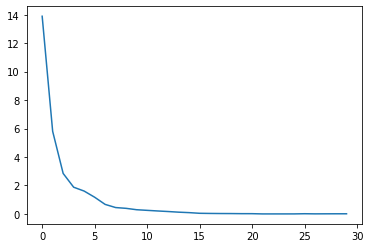

[1.38943383e+01 5.80392386e+00 2.84443117e+00 1.87741391e+00
 1.60552724e+00 1.17339288e+00 6.69078568e-01 4.47247028e-01
 3.91755604e-01 2.94574665e-01 2.50847030e-01 2.07723709e-01
 1.68208259e-01 1.22843294e-01 9.06597970e-02 4.38075146e-02
 3.36043600e-02 2.74886108e-02 2.46154844e-02 1.78254325e-02
 1.70366808e-02 7.77768079e-05 2.15018416e-04 6.08883490e-04
 1.34573915e-03 1.35151305e-02 4.38618478e-03 7.39837584e-03
 9.61950925e-03 9.30689197e-03]


In [19]:
# Print scree plot
Xt = X.T
Cx = np.cov(Xt)

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [20]:
# Use first four components as features in model
top_four_pca = pd.DataFrame(data=principal_components)
top_four_pca

0         1         2         3
0    7.411487  1.982815 -1.653208 -3.349256
1    2.688948 -3.548290 -0.486245 -1.059247
2    5.979160 -0.622361 -0.216932 -0.892575
3    5.531179  6.851685 -1.436812  0.432396
4    4.303638 -1.341186  0.666616 -3.631541
..        ...       ...       ...       ...
564  5.600189 -2.572129  1.940437 -1.374547
565  4.064104 -3.241672  2.997521  1.136442
566  2.490725 -2.107182  1.268661  1.198373
567  8.610182  1.307763  0.090168  1.914152
568 -7.915232  0.470339  3.004064  2.278218

[569 rows x 4 columns]

I will also run my models using these four principal components as features (refer to as pca).

## Build and Evaluate Models

FIX!!! Emphasize the importance of recall (want to optimize recall, better to incorrectly identify a benign sample as malginant rather than incorrectly identify a malignant sample as benign).

Accuracy (should be greater than major class), confusion matrix (sensitivity/recall is the percentage of positives correctly identified; specificity is just the opposite, the percentage of negatives correctly identified), precision (precision is the fraction of positive predictions that are actually positive), and f1 score (2*(Recall * Precision) / (Recall + Precision))

"Yes, accuracy is a great measure but only when you have symmetric datasets (false negatives & false positives counts are close), also, false negatives & false positives have similar costs.

If the cost of false positives and false negatives are different then F1 is your savior. F1 is best if you have an uneven class distribution.

Precision is how sure you are of your true positives whilst recall is how sure you are that you are not missing any positives.

Choose recall if the idea of false positives is far better than false negatives, in other words, if the occurrence of false negatives is unaccepted/intolerable, that you’d rather get some extra false positives(false alarms) over saving some false negatives, like in our diabetes example. You’d rather get some healthy people labeled diabetic over leaving a diabetic person labeled healthy.

Choose precision if you want to be more confident of your true positives. For example, Spam emails. You’d rather have some spam emails in your inbox rather than some regular emails in your spam box. So, the email company wants to be extra sure that email Y is spam before they put it in the spam box and you never get to see it.

Choose specificity if you want to cover all true negatives, meaning you don’t want any false alarms, you don’t want any false positives. for example, you’re running a drug test in which all people who test positive will immediately go to jail, you don’t want anyone drug-free going to jail. False positives here are intolerable."

https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124

In [21]:
# Create dataframe with diagnosis (target variable)
Y = bc_df['diagnosis']

In [22]:
# Normalize four select features using StandardScaler
# and create dataframe
scaled_features = StandardScaler().fit_transform(final_var)
select_df = pd.DataFrame(
    scaled_features, index=final_var.index, columns=final_var.columns)
select_df

radius_mean_boxcox  texture_mean_boxcox  smoothness_mean_boxcox  \
0              1.134881            -2.678666                1.504114   
1              1.619346            -0.264377               -0.820227   
2              1.464796             0.547806                0.963977   
3             -0.759262             0.357721                2.781494   
4              1.571260            -1.233520                0.343932   
..                  ...                  ...                     ...   
564            1.781795             0.785604                1.052829   
565            1.543335             1.845150                0.168014   
566            0.828589             1.817618               -0.835509   
567            1.624440             2.016299                1.468642   
568           -2.699432             1.203224               -3.834325   

     symmetry_mean_boxcox  
0                1.953067  
1                0.102291  
2                0.985668  
3                2.360528  
4                0.090964  
..                    ...  
564             -0.232645  
565             -0.129120  
566             -0.808189  
567              1.899087  
568             -0.821560  

[569 rows x 4 columns]

In [23]:
# Create dataframe with four PCA components
pca_df = top_four_pca
pca_df

0         1         2         3
0    7.411487  1.982815 -1.653208 -3.349256
1    2.688948 -3.548290 -0.486245 -1.059247
2    5.979160 -0.622361 -0.216932 -0.892575
3    5.531179  6.851685 -1.436812  0.432396
4    4.303638 -1.341186  0.666616 -3.631541
..        ...       ...       ...       ...
564  5.600189 -2.572129  1.940437 -1.374547
565  4.064104 -3.241672  2.997521  1.136442
566  2.490725 -2.107182  1.268661  1.198373
567  8.610182  1.307763  0.090168  1.914152
568 -7.915232  0.470339  3.004064  2.278218

[569 rows x 4 columns]

### Bernoulli Naive Bayes Classifier

FIX!!

Data is binary/boolean. Variables are independent. Data is standardized (z-scores).

#### Select Features

In [24]:
# Create training and testing sets from select_df (80/20 split)
X_train, x_test, Y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Optimize model for alpha = 0.1, 0.2, ..., 1.0
parameters = [{'alpha': np.linspace(0.1, 1, 10)}]

# Run grid search
clf = GridSearchCV(BernoulliNB(), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'alpha': 0.1}


In [25]:
# Instantiate model and store it in a new variable
bnb = BernoulliNB(alpha=0.1)

# Fit model to the data
model = bnb.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = bnb.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'alpha': 0.1, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

Train Accuracy: 88.0% (Explanatory)
Test Accuracy: 89.0% (Predictive)

Recall: 82.22%
Specificity: 92.75%
Precision: 88.1%

F1 Score: 0.85


##### Conclusion
Naives bayes model using select features:
* Not overfit or underfit (explanatory accuracy similar to predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* Med precision (percent labeled malignant that actually are malignant)

#### PCA Features

In [26]:
# Create training and testing sets from pca_df (80/20 split)
X_train, x_test, Y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Optimize model for alpha = 0.1, 0.2, ..., 1.0
parameters = [{'alpha': np.linspace(0.1, 1, 10)}]

# Run grid search
clf = GridSearchCV(BernoulliNB(), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'alpha': 0.1}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
# Instantiate model and store it in a new variable
bnb = BernoulliNB(alpha=0.1)

# Fit model to the data
model = bnb.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = bnb.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'alpha': 0.1, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

Train Accuracy: 89.0% (Explanatory)
Test Accuracy: 87.0% (Predictive)

Recall: 86.67%
Specificity: 86.96%
Precision: 81.25%

F1 Score: 0.84


##### Conclusion
Naives bayes model using PCA features:
* Not overfit or underfit (explanatory accuracy similar to predictive accuracy; both greater than major class)
* Med recall (percent malignant correctly identified)
* Med specificity (percent benign correctly identified)
* Low precision (percent labeled malignant that actually are malignant)

**This is the best model in terms of recall.**

### K-Nearest Neighbors Classifier

Need to normalize the features (distance needs to be the same) -- use z-scores
Weight by distance

#### Select Features

In [28]:
# Create training and testing sets from select_df (80/20 split)
X_train, x_test, Y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Run grid search
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
# Instantiate model and store it in a new variable
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')

# Fit model to the data
model = knn.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = knn.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

Train Accuracy: 94.0% (Explanatory)
Test Accuracy: 91.0% (Predictive)

Recall: 80.0%
Specificity: 98.55%
Precision: 97.3%

F1 Score: 0.88


##### Conclusion
K-nearest neighbors model using select features:
* Slightly overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)

#### PCA Features

In [30]:
# Create training and testing sets from select_df (80/20 split)
X_train, x_test, Y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'n_neighbors': [1, 3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan', 'minkowski'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Run grid search
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
# Instantiate model and store it in a new variable
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

# Fit model to the data
model = knn.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = knn.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

Train Accuracy: 97.0% (Explanatory)
Test Accuracy: 89.0% (Predictive)

Recall: 77.78%
Specificity: 95.65%
Precision: 92.11%

F1 Score: 0.84


##### Conclusion
K-nearest neighbors model using PCA features:
* Overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)

### Decision Tree Classifier

#### Select Features

In [32]:
# Create training and testing sets from select_df (80/20 split)
X_train, x_test, Y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 1, 3, 5, 7, 9],
              'max_features': [1, 2, 3, 4]}

# Run grid search
clf = GridSearchCV(DecisionTreeClassifier(random_state=1234), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'splitter': 'best'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
# Instantiate model and store it in a new variable
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=3)

# Fit model to the data
model = dtc.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = dtc.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Train Accuracy: 100.0% (Explanatory)
Test Accuracy: 89.0% (Predictive)

Recall: 84.44%
Specificity: 92.75%
Precision: 88.37%

F1 Score: 0.86


##### Conclusion
Decision tree model using select features:
* Overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* Med precision (percent labeled malignant that actually are malignant)

#### PCA Features

In [34]:
# Create training and testing sets from select_df (80/20 split)
X_train, x_test, Y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 2, 3, 4]}

# Run grid search
clf = GridSearchCV(DecisionTreeClassifier(random_state=1234), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

{'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'splitter': 'best'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
# Instantiate model and store it in a new variable
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features=4)

# Fit model to the data
model = dtc.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = dtc.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Train Accuracy: 100.0% (Explanatory)
Test Accuracy: 88.0% (Predictive)

Recall: 73.33%
Specificity: 97.1%
Precision: 94.29%

F1 Score: 0.82


##### Conclusion
Decision tree model using PCA features:
* Overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)

#### All Features

In [36]:
# Normalize all features using StandardScaler
# and create dataframe
scaled_features_all = StandardScaler().fit_transform(var_boxcox)
all_df = pd.DataFrame(
    scaled_features_all, index=var_boxcox.index, columns=var_boxcox.columns)
all_df

radius_mean_boxcox  texture_mean_boxcox  perimeter_mean_boxcox  \
0              1.134881            -2.678666               1.259822   
1              1.619346            -0.264377               1.528723   
2              1.464796             0.547806               1.454664   
3             -0.759262             0.357721              -0.514886   
4              1.571260            -1.233520               1.583340   
..                  ...                  ...                    ...   
564            1.781795             0.785604               1.746492   
565            1.543335             1.845150               1.485601   
566            0.828589             1.817618               0.811329   
567            1.624440             2.016299               1.702747   
568           -2.699432             1.203224              -2.827766   

     area_mean_boxcox  smoothness_mean_boxcox  compactness_mean_boxcox  \
0            1.126421                1.504114                 2.165938   
1            1.633946               -0.820227                -0.384102   
2            1.461645                0.963977                 1.163977   
3           -0.836238                2.781494                 2.197843   
4            1.595120                0.343932                 0.762392   
..                ...                     ...                      ...   
564          1.823030                1.052829                 0.460810   
565          1.545430                0.168014                 0.207602   
566          0.835270               -0.835509                 0.183969   
567          1.551036                1.468642                 2.162820   
568         -2.703256               -3.834325                -1.481409   

     concavity_mean_boxcox  concave_points_mean_boxcox  symmetry_mean_boxcox  \
0                 1.862988                    1.848558              1.953067   
1                 0.291976                    0.820609              0.102291   
2                 1.403673                    1.683104              0.985668   
3                 1.642391                    1.423004              2.360528   
4                 1.407479                    1.410929              0.090964   
..                     ...                         ...                   ...   
564               1.653784                    1.783067             -0.232645   
565               0.984746                    1.320730             -0.129120   
566               0.375105                    0.396882             -0.808189   
567               1.994466                    1.884414              1.899087   
568              -1.658319                   -1.845392             -0.821560   

     fractal_dimension_mean_boxcox  ...  radius_worst_boxcox  \
0                         1.886398  ...             1.619635   
1                        -0.956577  ...             1.578689   
2                        -0.292433  ...             1.419757   
3                         2.708924  ...            -0.083692   
4                        -0.511332  ...             1.293727   
..                             ...  ...                  ...   
564                      -1.053698  ...             1.626869   
565                      -1.259564  ...             1.433823   
566                      -0.998237  ...             0.769202   
567                       1.147810  ...             1.656477   
568                      -0.509387  ...            -2.127115   

     texture_worst_boxcox  perimeter_worst_boxcox  area_worst_boxcox  \
0               -1.488367                1.810506           1.652210   
1               -0.288382                1.430616           1.610022   
2                0.071406                1.321941           1.425307   
3                0.228089               -0.039480          -0.436860   
4               -1.637882                1.316582           1.309486   
..                    ...                     ...                ...   
564              0.212151    

In [37]:
# Create training and testing sets from select_df (80/20 split)
X_train, x_test, Y_train, y_test = train_test_split(
    all_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 5, 10, 15, 20, 25, 30]}

# Run grid search
clf = GridSearchCV(DecisionTreeClassifier(random_state=1234), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

{'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'splitter': 'best'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
# Instantiate model and store it in a new variable
dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=10)

# Fit model to the data
model = dtc.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = dtc.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}

Train Accuracy: 98.0% (Explanatory)
Test Accuracy: 91.0% (Predictive)

Recall: 84.44%
Specificity: 95.65%
Precision: 92.68%

F1 Score: 0.88


##### Conclusion
Decision tree model using all features:
* Overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)

### Random Forest Classifier

#### Select Features

In [39]:
X_train, x_test, Y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'n_estimators': [10],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 2, 3, 4]}

# Run grid search
clf = GridSearchCV(RandomForestClassifier(random_state=1234), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'n_estimators': 10}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
# Instantiate model and store it in a new variable
rfc = RandomForestClassifier(criterion='gini', max_depth=5, max_features=2)

# Fit model to the data
model = rfc.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = rfc.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Accuracy: 97.0% (Explanatory)
Test Accuracy: 89.0% (Predictive)

Recall: 82.22%
Specificity: 94.2%
Precision: 90.24%

F1 Score: 0.86


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Conclusion
Random forest model using select features:
* Overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)

#### PCA Features

In [41]:
X_train, x_test, Y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'n_estimators': [10],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 2, 3, 4]}

# Run grid search
clf = GridSearchCV(RandomForestClassifier(random_state=1234), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

{'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'n_estimators': 10}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
# Instantiate model and store it in a new variable
rfc = RandomForestClassifier(criterion='gini', max_depth=5, max_features=2)

# Fit model to the data
model = rfc.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = rfc.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Accuracy: 100.0% (Explanatory)
Test Accuracy: 89.0% (Predictive)

Recall: 77.78%
Specificity: 97.1%
Precision: 94.59%

F1 Score: 0.85


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Conclusion
Random forest model using PCA features:
* Overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)

#### All Features

In [43]:
X_train, x_test, Y_train, y_test = train_test_split(
    all_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'n_estimators': [10],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 1, 3, 5, 7, 9, 11],
              'max_features': [1, 5, 10, 20, 30]}

# Run grid search
clf = GridSearchCV(RandomForestClassifier(random_state=1234), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'n_estimators': 10}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
# Instantiate model and store it in a new variable
rfc = RandomForestClassifier(criterion='gini', max_depth=5, max_features=10)

# Fit model to the data
model = rfc.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = rfc.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Accuracy: 100.0% (Explanatory)
Test Accuracy: 91.0% (Predictive)

Recall: 82.22%
Specificity: 97.1%
Precision: 94.87%

F1 Score: 0.88


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Conclusion
Random forest model using all features:
* Overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)

### Linear Support Vector Binary Classifier

#### Select Features

In [45]:
X_train, x_test, Y_train, y_test = train_test_split(
    select_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'C': [0.01, 0.1, 0.5, 1],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
              'degree': [1, 2, 3],
              'gamma': ['scale', 'auto']}

# Run grid search
clf = GridSearchCV(SVC(random_state=1234), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

{'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [46]:
# Instantiate model and store it in a new variable
svc = SVC(C=1, degree=1, gamma='scale', kernel='linear')

# Fit model to the data
model = svc.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = svc.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'C': 1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Train Accuracy: 95.0% (Explanatory)
Test Accuracy: 91.0% (Predictive)

Recall: 80.0%
Specificity: 98.55%
Precision: 97.3%

F1 Score: 0.88


##### Conclusion
Linear support vector model using select features:
* Slightly overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)

#### PCA Features

In [47]:
X_train, x_test, Y_train, y_test = train_test_split(
    pca_df, Y, test_size=0.2, random_state=1234)

# Optimize model
parameters = {'C': [0.01, 0.1, 0.5, 1],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
              'degree': [1, 2, 3],
              'gamma': ['scale', 'auto']}

# Run grid search
clf = GridSearchCV(SVC(random_state=1234), parameters, cv=10, scoring='f1')
clf.fit(X_train, Y_train)

print(clf.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: Undefined

{'C': 0.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
# Instantiate model and store it in a new variable
svc = SVC(C=0.5, degree=1, gamma='scale', kernel='linear')

# Fit model to the data
model = svc.fit(X_train, Y_train)
print(model.get_params())  # Check parameters

# Classify and store the results in a new variable
y_pred = svc.predict(x_test)

# Evaluate model
# Accuracy
accuracy_train = round(model.score(X_train, Y_train), 2) * 100
accuracy_test = round(model.score(x_test, y_test), 2) * 100
# Percent malignant (pos) correctly identified (also called sensitivity)
recall = round(recall_score(y_test, y_pred) * 100, 2)
# Percent benign (neg) correctly identified
conf_mat = confusion_matrix(y_test, y_pred)
specificity = round(conf_mat[0][0] / conf_mat[0].sum() * 100, 2)
# Percent labeled malignant that are malignant
precision = round(precision_score(y_test, y_pred) * 100, 2)
# F1 score 2*(Recall * Precision) / (Recall + Precision)
f1 = round(f1_score(y_test, y_pred), 2)

print('\nTrain Accuracy: {}% (Explanatory)\nTest Accuracy: {}% (Predictive)\n'.format(
    accuracy_train, accuracy_test))
print('Recall: {}%\nSpecificity: {}%\nPrecision: {}%\n\nF1 Score: {}'.format(
    recall, specificity, precision, f1))

{'C': 0.5, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Train Accuracy: 98.0% (Explanatory)
Test Accuracy: 91.0% (Predictive)

Recall: 80.0%
Specificity: 98.55%
Precision: 97.3%

F1 Score: 0.88


##### Conclusion
Linear support vector model using PCA features:
* Overfit (explanatory accuracy higher than predictive accuracy; both greater than major class)
* Low recall (percent malignant correctly identified)
* High specificity (percent benign correctly identified)
* High precision (percent labeled malignant that actually are malignant)